In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import pandas as pd
import os
import sys
import scipy
from iminuit import Minuit
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *
from ExternalFunctions import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
parent_path = '../../../../'
path_S1 = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 1/'
path_S2 = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 2/'

MA1 = read_csv_BC(f'{path_S1}MA200/', parent_path, -1)
MA2 = read_csv_BC(f'{path_S2}MA200/', parent_path, -1)
MA1['MA200-0369_241217094901'] = pd.concat([MA1['MA200-0369_241217094901'], MA1['MA200-0369_241217101259']], ignore_index=True)

MA = merge_dicts(MA1, MA2)

2024-12-11 09:00:00
UV and IR
<ValueView p=416.96611775268764 mu=1.147641692630153 sigma=0.13315873869000638>
<ErrorView p=20.644746452830045 mu=0.006930726581260445 sigma=0.005709321508886159>
2024-12-11 09:00:00
UV and IR
<ValueView p=303.6625540163101 mu=1.3159458353448577 sigma=0.7554209728696022>
<ErrorView p=17.63382009615044 mu=0.04647460262211584 sigma=0.03722483887386813>
2024-12-13 08:45:00
UV and IR
<ValueView p=318.3607651755382 mu=1.089351604860883 sigma=0.0697100282122398>
<ErrorView p=18.602806391912495 mu=0.004592373508625824 sigma=0.003937575690666698>
2024-12-13 08:45:00
UV and IR
<ValueView p1=189.54384950179954 mu1=0.806393578706739 sigma1=0.47724446788022423 p2=94.0725638312613 mu2=1.0827596824246346 sigma2=0.14592480108899208>
<ErrorView p1=19.62163754344114 mu1=0.044280138768199244 sigma1=0.03304536641400133 p2=15.859186369229851 mu2=0.021032742532438583 sigma2=0.03390571604315776>
2024-12-16 09:45:00
UV and IR
<ValueView p=352.2855547248744 mu=0.9951892384102771

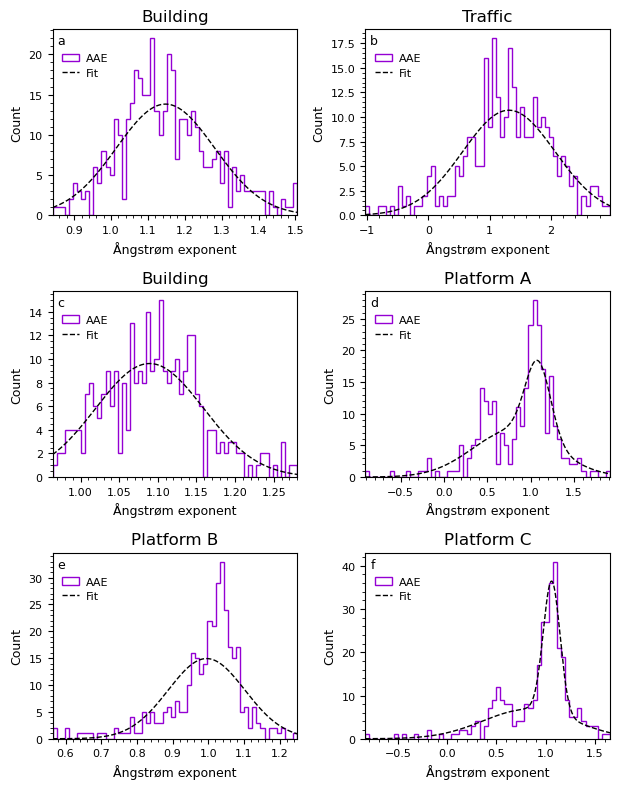

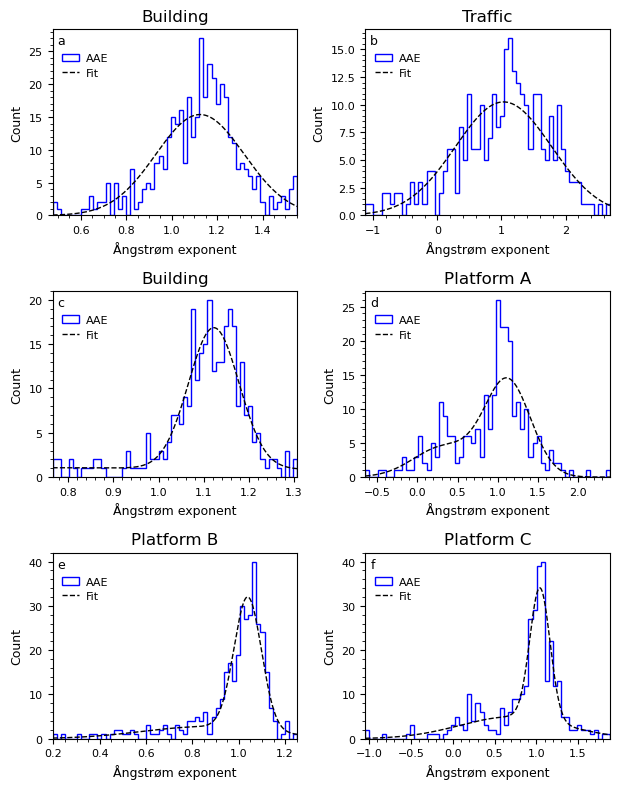

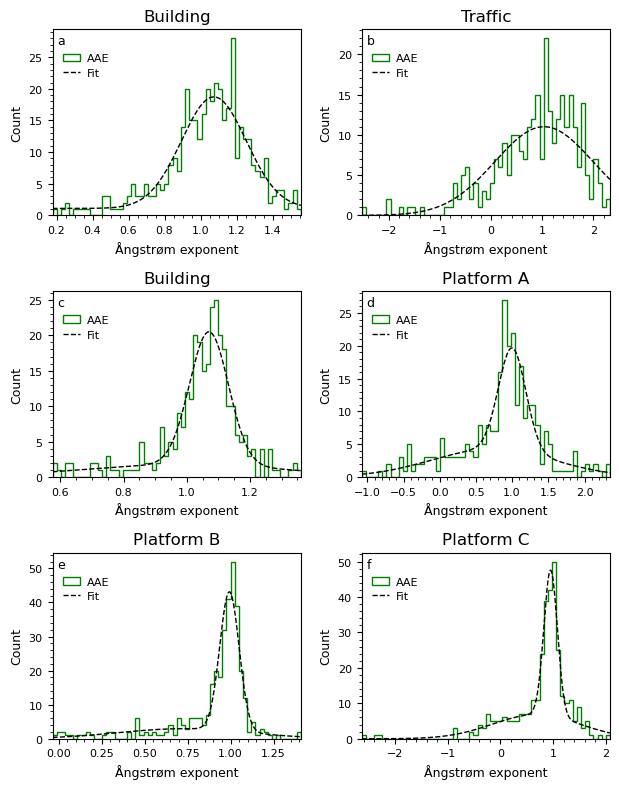

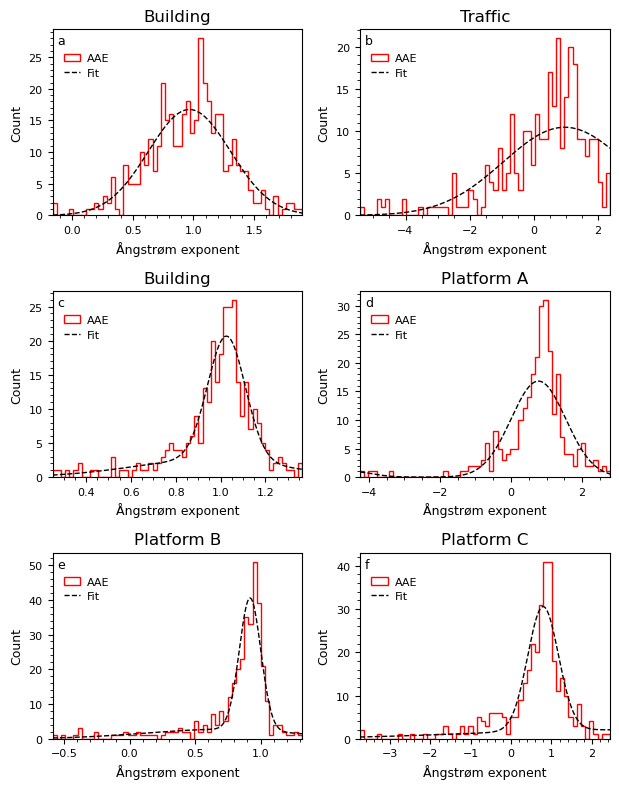

In [3]:
timestamps = [['2024-12-11 09:00:00', '2024-12-11 16:00:00'],
              ['2024-12-11 09:00:00', '2024-12-11 16:00:00'],
              ['2024-12-13 08:45:00', '2024-12-13 14:00:00'],
              ['2024-12-13 08:45:00', '2024-12-13 14:00:00'],
              ['2024-12-16 09:45:00', '2024-12-16 15:45:00'],
              ['2024-12-16 09:45:00', '2024-12-16 15:45:00']]

keys = ['MA200-0369_241211095501', 'MA200-0285_241211093400',
        'MA200-0369_241213094000', 'MA200-0285_241213092900',
        'MA200-0369_241216103300', 'MA200-0285_241216102104']

UV_initial = [{'p': 400, 'mu': 1.1, 'sigma': 0.5},
              {'p': 400, 'mu': 2, 'sigma': 0.5},
              {'p': 300,  'mu': 1.1, 'sigma': 0.3},
              {'p1': 400,  'mu1': 1, 'sigma1': 0.01, 'p2': 300,  'mu2': 0.5, 'sigma2': 0.01},
              {'p': 300, 'mu': 1.05, 'sigma': 0.05},   #, 'p2': 100, 'mu2': 0.5,'sigma2': 0.1},
              {'p1': 300, 'mu1': 1.1, 'sigma1': 0.1, 'p2': 100, 'mu2': 0.5,'sigma2': 0.1}]

Blue_initial = [{'p': 400, 'mu': 1, 'sigma': 0.5},
                {'p': 400, 'mu': 2, 'sigma': 0.5},
                {'p1': 300,  'mu1': 1.1, 'sigma1': 0.3, 'p2': 100,  'mu2': 0.8, 'sigma2': 0.05},
                {'p1': 400,  'mu1': 1, 'sigma1': 0.05, 'p2': 400,  'mu2': 0.3, 'sigma2': 0.05},
                {'p1': 500,  'mu1': 1.25, 'sigma1': 0.5, 'p2': 100,  'mu2': 0.8, 'sigma2': 0.5},
                {'p1': 400,  'mu1': 1.1, 'sigma1': 0.1, 'p2': 200,  'mu2': 0.25, 'sigma2': 0.1}]

Green_initial = [{'p1': 400, 'mu1': 1.1, 'sigma1': 0.5, 'p2': 400, 'mu2': 0.6, 'sigma2': 0.5},
                 {'p': 400, 'mu': 2, 'sigma': 0.5},
                 {'p1': 300,  'mu1': 1.1, 'sigma1': 0.3, 'p2': 100,  'mu2': 0.8, 'sigma2': 0.05},
                 {'p1': 400,  'mu1': 1, 'sigma1': 0.05, 'p2': 400,  'mu2': 1, 'sigma2': 0.5},
                 {'p1': 500,  'mu1': 0.9, 'sigma1': 0.1, 'p2': 100,  'mu2': 0.75, 'sigma2': 0.5},
                 {'p1': 400,  'mu1': 1.1, 'sigma1': 0.1, 'p2': 200,  'mu2': 1.05, 'sigma2': 0.1}]

Red_initial = [{'p': 400, 'mu': 2, 'sigma': 0.5},
               {'p': 400, 'mu': 2, 'sigma': 0.5},
               {'p1': 300,  'mu1': 1.1, 'sigma1': 0.3, 'p2': 100,  'mu2': 0.8, 'sigma2': 0.05},
               {'p1': 400,  'mu1': 1, 'sigma1': 0.05, 'p2': 400,  'mu2': 1, 'sigma2': 0.1},
               {'p1': 500,  'mu1': 0.8, 'sigma1': 0.1, 'p2': 100,  'mu2': -2, 'sigma2': 0.5},
            {'p1': 400,  'mu1': 0.8, 'sigma1': 0.1, 'p2': 200,  'mu2': 0.5, 'sigma2': 0.1}]

initial_list = [UV_initial, Blue_initial, Green_initial, Red_initial]

fit_functions = [[gauss, gauss, gauss, d_gauss, gauss, d_gauss],
                 [gauss, gauss, d_gauss, d_gauss, d_gauss, d_gauss],
                 [d_gauss, gauss, d_gauss, d_gauss, d_gauss, d_gauss],
                 [gauss, gauss, d_gauss, d_gauss, d_gauss, d_gauss]]

figs, axes, AAE1 = AAE_hist(3, 2, (6.3, 8), MA, keys, timestamps, 60, fit_functions, initial_list, True)

names = ['UV-IR', 'Blue-IR', 'Green-IR', 'Red-IR']
titles = ['Building', 'Traffic', 'Building', 'Platform A', 'Platform B', 'Platform C']
sublabels = ['a', 'b', 'c', 'd', 'e', 'f']
for i, axs in enumerate(axes):
    for j, ax in enumerate(axs.flatten()):
        ax.text(0.02, 0.92, sublabels[j], transform = ax.transAxes, fontsize = 9)
        ax.set(title = titles[j])
    figs[i].tight_layout()
    figs[i].savefig(f'Gaussian_fits/AAE1_{names[i]}.pdf', dpi = 600)

2024-12-10 09:15:00
UV and IR
<ValueView p=369.8187340434855 mu=1.3123158342540093 sigma=0.331939376443712>
<ErrorView p=19.928266502247272 mu=0.01985914455794167 sigma=0.01726071396883995>
2024-12-10 09:15:00
UV and IR
<ValueView p=144.62532106455774 mu=1.230193161890048 sigma=0.6690145396724666>
<ErrorView p=14.238112619521207 mu=0.07567281650792021 sigma=0.08133806200222132>
2024-12-12 09:00:00
UV and IR
<ValueView p1=330.88069846881405 mu1=1.178167142092461 sigma1=0.1280759485185264 p2=90.39681861773245 mu2=1.4799245826234477 sigma2=0.27048494320149635>
<ErrorView p1=45.39774364167344 mu1=0.011361309529428602 sigma1=0.010791425885662648 p2=43.78214208482618 mu2=0.14780386845111196 sigma2=0.08583711178997823>
2024-12-12 09:00:00
UV and IR
<ValueView p1=227.12136460871906 mu1=0.9965195076916286 sigma1=0.32752711500505266 p2=170.1097051677702 mu2=1.0859430931545133 sigma2=0.08544400424142545>
<ErrorView p1=27.03438167814596 mu1=0.025889186539193084 sigma1=0.026088047446032832 p2=26.63

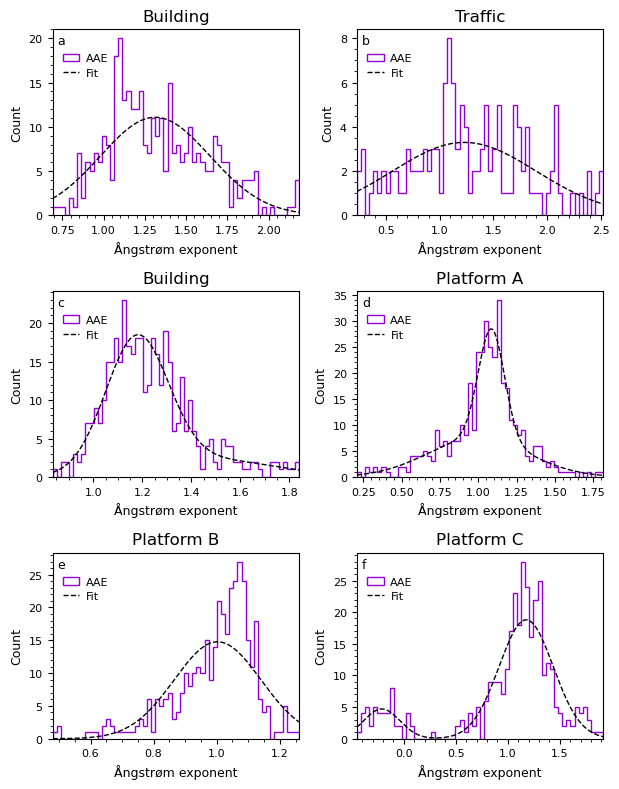

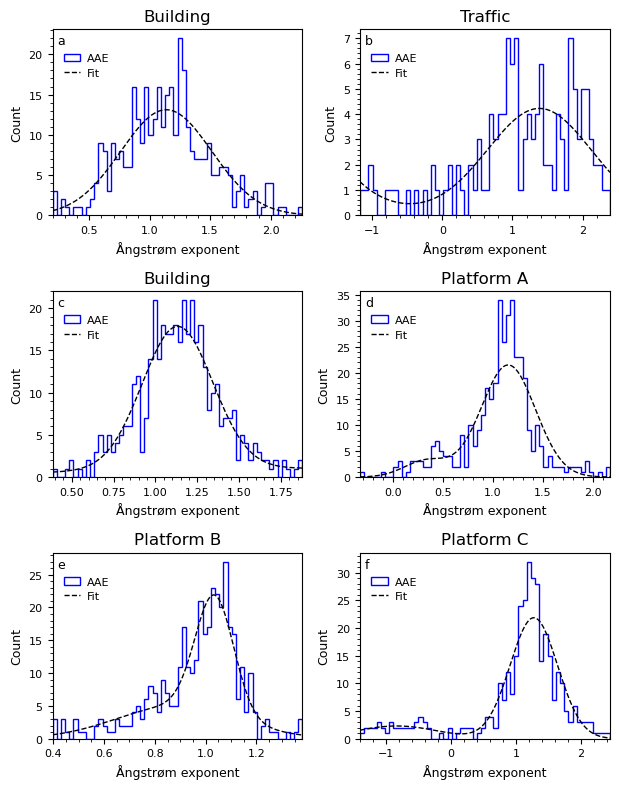

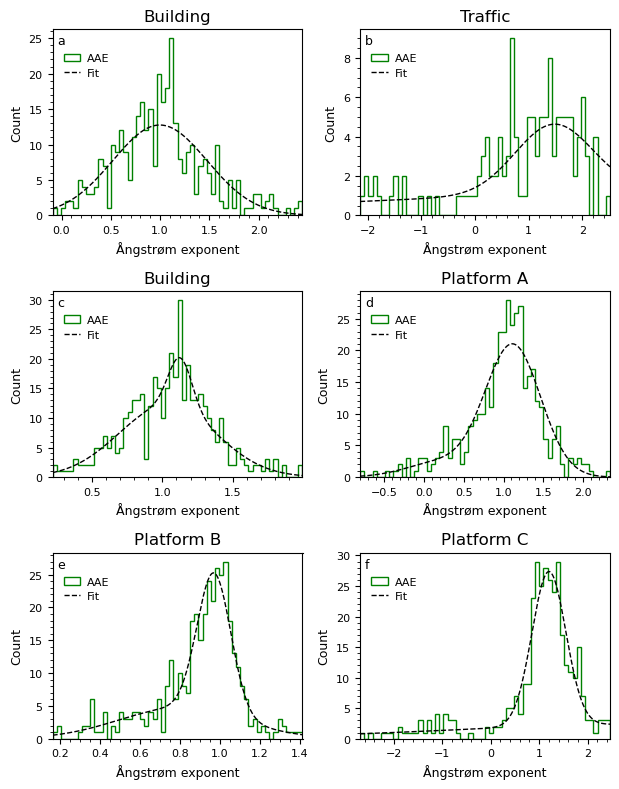

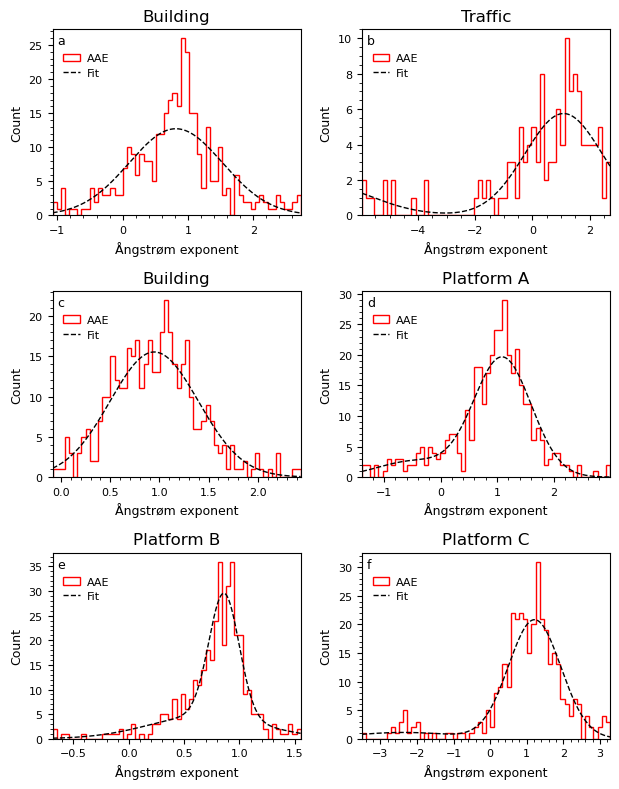

In [4]:
timestamps = [['2024-12-10 09:15:00', '2024-12-10 16:00:00'],
              ['2024-12-10 09:15:00', '2024-12-10 16:00:00'],
              ['2024-12-12 09:00:00', '2024-12-12 16:00:00'],
              ['2024-12-12 09:00:00', '2024-12-12 16:00:00'],
              ['2024-12-17 09:15:00', '2024-12-17 15:45:00'],
              ['2024-12-17 09:15:00', '2024-12-17 15:45:00']]

keys = ['MA200-0369_241210105000', 'MA200-0285_241210105200',
        'MA200-0369_241212094705', 'MA200-0285_241212093100',
        'MA200-0369_241217094901', 'MA200-0285_241217101400']

UV_initial = [{'p': 350, 'mu': 2, 'sigma': 0.5},
              {'p': 250, 'mu': 1.1, 'sigma': 0.5},
              {'p1': 500,  'mu1': 1.25, 'sigma1': 0.5, 'p2': 100,  'mu2': 1.5, 'sigma2': 0.1},
              {'p1': 400,  'mu1': 1.1, 'sigma1': 0.5, 'p2': 200,  'mu2': 1.05, 'sigma2': 0.03},
              {'p': 500, 'mu': 1, 'sigma': 0.1},    # , 'p2': 100, 'mu2': 0.1,'sigma2': 0.5},
              {'p1': 500, 'mu1': 1.5, 'sigma1': 0.1, 'p2': 100, 'mu2': -0.3,'sigma2': 0.1}]

Blue_initial = [{'p': 350, 'mu': 2, 'sigma': 0.5},
                {'p1': 250, 'mu1': 1.5, 'sigma1': 0.5, 'p2': 250, 'mu2': 1.5, 'sigma2': 0.5},
                {'p1': 500,  'mu1': 1.25, 'sigma1': 0.5, 'p2': 100,  'mu2': 1.5, 'sigma2': 0.1},
                {'p1': 400,  'mu1': 1.1, 'sigma1': 0.1, 'p2': 200,  'mu2': 1.05, 'sigma2': 0.1},
                {'p1': 300,  'mu1': 1.1, 'sigma1': 0.3, 'p2': 100,  'mu2': 0.8, 'sigma2': 0.05},
                {'p1': 400,  'mu1': 1, 'sigma1': 0.05, 'p2': 400,  'mu2': 0.3, 'sigma2': 0.05}]

Green_initial = [{'p': 350, 'mu': 2, 'sigma': 0.5},
                 {'p1': 250, 'mu1': 2, 'sigma1': 0.5, 'p2': 250, 'mu2': 2, 'sigma2': 0.5},
                 {'p1': 500,  'mu1': 1.25, 'sigma1': 0.5, 'p2': 100,  'mu2': 1.5, 'sigma2': 0.1},
                 {'p1': 400,  'mu1': 1.1, 'sigma1': 0.1, 'p2': 200,  'mu2': 1.05, 'sigma2': 0.1},
                 {'p1': 300,  'mu1': 1.1, 'sigma1': 0.3, 'p2': 100,  'mu2': 0.8, 'sigma2': 0.05},
                 {'p1': 400,  'mu1': 1.2, 'sigma1': 0.1, 'p2': 400,  'mu2': -1, 'sigma2': 0.5}]

Red_initial = [{'p': 350, 'mu': 2, 'sigma': 0.5},   # 'p2': 350, 'mu2': 2, 'sigma2': 0.5},
               {'p1': 250, 'mu1': 1, 'sigma1': 0.5, 'p2': 250, 'mu2': 1, 'sigma2': 0.5},
               {'p': 500,  'mu': 1.25, 'sigma': 0.5},   #'p2': 100,  'mu2': 1.5, 'sigma2': 0.1},
               {'p1': 400,  'mu1': 1.1, 'sigma1': 0.1, 'p2': 200,  'mu2': 1.05, 'sigma2': 0.1},
               {'p1': 300,  'mu1': 1.1, 'sigma1': 0.3, 'p2': 100,  'mu2': 0.8, 'sigma2': 0.05},
               {'p1': 400,  'mu1': 1, 'sigma1': 0.05, 'p2': 400,  'mu2': 1, 'sigma2': 0.1}]

initial_list = [UV_initial, Blue_initial, Green_initial, Red_initial]

fit_functions = [[gauss, gauss, d_gauss, d_gauss, gauss, d_gauss],
                 [gauss, d_gauss, d_gauss, d_gauss, d_gauss, d_gauss],
                 [gauss, d_gauss, d_gauss, d_gauss, d_gauss, d_gauss],
                 [gauss, d_gauss, gauss, d_gauss, d_gauss, d_gauss]]

figs, axes, AAE2 = AAE_hist(3, 2, (6.3, 8), MA, keys, timestamps, 60, fit_functions, initial_list, True)

names = ['UV-IR', 'Blue-IR', 'Green-IR', 'Red-IR']
titles = ['Building', 'Traffic', 'Building', 'Platform A', 'Platform B', 'Platform C']
sublabels = ['a', 'b', 'c', 'd', 'e', 'f']
for i, axs in enumerate(axes):
    for j, ax in enumerate(axs.flatten()):
        ax.text(0.02, 0.92, sublabels[j], transform = ax.transAxes, fontsize = 9)
        ax.set(title = titles[j])
    figs[i].tight_layout()
    figs[i].savefig(f'Gaussian_fits/AAE2_{names[i]}.pdf', dpi = 600)